In [1]:
import pandas as pd
import seaborn as sns

D:\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("D:\\college notes\\6 sem notes\\Data mining\\Dataset11-Weather-Data.csv")
print(data.head())
print(data.shape)

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
(8784, 8)


In [3]:
print(data.Weather.value_counts())
print(data.Weather.nunique())

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

## Converting Weather Categories into Standard Categories

In [4]:
from itertools import chain
x="Thunderstorms, Moderate Rain Showers, Fog"
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(",")]
    flat_list=list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if "Fog" in list1 and "Rain" in list1:
        return "RAIN+FOG"
    elif "Snow" in list1 and "Rain" in list1:
        return "SNOW+RAIN"
    elif "Snow" in list1:
        return "SNOW"
    elif "Rain" in list1:
        return "RAIN"
    elif "Fog" in list1:
        return "FOG"
    elif "Clear" in list1:
        return "CLEAR"
    elif "Cloudy" in list1:
        return "CLOUDY"
    else:
        return "RAIN"
print(Create_list(x))

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']


In [5]:
data["Std_Weather"]=data["Weather"].apply(
    lambda x : Get_Weather(Create_list(x)))
data.Std_Weather.value_counts()

CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: Std_Weather, dtype: int64

## Sample Selection and Data Balancing

In [6]:
cloudy_df_sample=data[data["Std_Weather"]=="CLOUDY"].sample(600)
clear_df=data[data['Std_Weather'] == 'CLEAR'].sample(600)
rain_df = data[data['Std_Weather'] =="RAIN"]
snow_df = data[data["Std_Weather"]=="SNOW"]
fog_df = data[data["Std_Weather"]=="FOG"]

## Create new Weather Dataset

In [7]:
weather_df = pd.concat([
    cloudy_df_sample,clear_df,rain_df,snow_df,fog_df], axis=0)
print(weather_df.shape)
print(weather_df.Std_Weather.value_counts())

(2600, 9)
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
FOG       241
Name: Std_Weather, dtype: int64


## Drop Cloumns data and Weather

In [8]:
weather_df.drop(columns = ['Date/Time', 'Weather'],axis=1,inplace=True)

## NUll / Missing Values

In [9]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

## Data Visualization

## Correlation among the features

In [10]:
cols=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 
      'Visibility_km','Press_kPa']
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.938822,-0.229234,-0.134863,0.362585,-0.116465
Dew Point Temp_C,0.938822,1.000000,0.113738,-0.147609,0.130772,-0.213293
Rel Hum_%,-0.229234,0.113738,1.000000,-0.034823,-0.704431,-0.276938
Wind Speed_km/h,-0.134863,-0.147609,-0.034823,1.000000,-0.067362,-0.390025
Visibility_km,0.362585,0.130772,-0.704431,-0.067362,1.000000,0.267491
Press_kPa,-0.116465,-0.213293,-0.276938,-0.390025,0.267491,1.000000


## Heat Map

<AxesSubplot:>

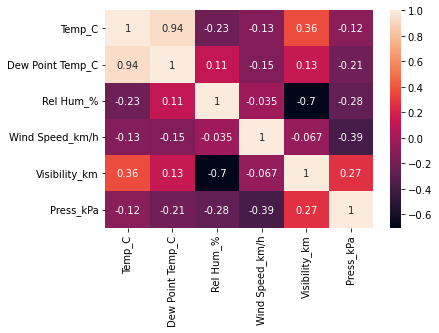

In [11]:
sns.heatmap(cor_matrix, annot=True)

## Label Encoding

converting target variable into numeric

In [12]:
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()
weather_df['Std_Weather']=label_Encoder.fit_transform(
    weather_df['Std_Weather'])
weather_df.head(100)
weather_df['Std_Weather'].unique()
cloudy_df_sample,clear_df,rain_df,snow_df,fog_df

(            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
 4988  7/26/2012 20:00    20.5              17.6         83                4   
 5317   8/9/2012 13:00    23.6              17.4         68               19   
 4171  6/22/2012 19:00    25.7              11.7         42               11   
 8123  12/4/2012 11:00    10.1               7.7         85               17   
 2161   3/31/2012 1:00     1.3              -9.6         44               13   
 ...               ...     ...               ...        ...              ...   
 4893  7/22/2012 21:00    26.9              17.0         55               15   
 3295   5/17/2012 7:00    10.2               1.8         56               15   
 1543    3/5/2012 7:00   -16.2             -22.3         59               22   
 4096  6/19/2012 16:00    27.7              19.0         59               17   
 5245   8/6/2012 13:00    21.4              13.7         61               13   
 
       Visibility_km  Press_kPa       

## x,y variables

In [13]:
# Independent Variables
x=weather_df.drop(["Std_Weather"],axis=1)
#Target variables:
y=weather_df["Std_Weather"]
print(x.head())
y.head()
print(y)

      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
4988    20.5              17.6         83                4           24.1   
5317    23.6              17.4         68               19           24.1   
4171    25.7              11.7         42               11           48.3   
8123    10.1               7.7         85               17           24.1   
2161     1.3              -9.6         44               13           25.0   

      Press_kPa  
4988      99.94  
5317     100.94  
4171     100.38  
8123     101.06  
2161     101.31  
4988    1
5317    1
4171    1
8123    1
2161    1
       ..
8716    2
8717    2
8718    2
8719    2
8722    2
Name: Std_Weather, Length: 2600, dtype: int32


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_std=std_scaler.fit_transform(x)
X_std

array([[ 1.25970077,  1.52949626,  0.54971882, -1.28124118,  0.18178813,
        -0.96102149],
       [ 1.53885615,  1.51018195, -0.36491573,  0.33481335,  0.18178813,
         0.11227969],
       [ 1.7279614 ,  0.9597242 , -1.95028228, -0.5270824 ,  2.00858275,
        -0.48876897],
       ...,
       [-1.82901842, -1.64770725,  0.854597  , -1.28124118, -0.90523016,
         0.44500305],
       [-1.91906854, -1.75393593,  0.854597  , -0.95803028, -1.0335587 ,
         0.41280402],
       [-1.6669282 , -1.45456418,  0.97654827, -0.95803028, -1.15433851,
         0.33767293]])

## Splitting Data into training and testing 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((2080, 6), (520, 6))

## Model Building

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr_model = LogisticRegression()
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier()

## Model Training

In [17]:
print(lr_model.fit(x_train,y_train))
print(dt_model.fit(x_train,y_train))
print(rf_model.fit(x_train,y_train))

D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()


## Model Prediction

In [18]:
y_pred_lr=lr_model.predict(x_test)
y_pred_dt=dt_model.predict(x_test)
y_pred_rf=rf_model.predict(x_test)
print(y_pred_lr)

[3 0 3 4 3 4 1 0 0 4 4 3 1 3 3 1 3 3 3 0 4 0 4 3 4 3 4 0 0 0 1 4 0 1 2 3 1
 1 4 3 3 0 0 0 4 1 2 3 4 1 3 0 1 3 3 0 0 3 2 3 0 3 3 2 3 3 3 4 1 2 3 0 1 4
 3 3 4 0 3 3 4 0 3 1 2 2 4 3 3 3 0 0 0 4 0 3 2 4 0 1 3 3 0 3 1 3 4 0 4 1 0
 4 3 4 3 3 0 3 3 3 3 2 1 3 0 3 2 0 0 4 4 3 4 4 4 1 1 4 2 0 0 4 4 1 4 2 4 0
 4 3 3 4 1 4 0 1 3 1 0 4 0 3 2 1 0 0 3 4 1 4 3 1 1 0 4 3 1 1 2 4 2 0 1 4 4
 0 2 0 4 0 1 3 4 4 3 2 4 3 4 0 0 4 3 0 0 1 3 0 0 0 2 4 4 0 4 0 3 4 3 0 2 4
 1 1 4 3 3 4 3 3 0 3 4 2 4 4 4 1 1 1 3 3 2 0 1 1 3 1 1 1 1 1 2 2 2 0 4 4 0
 4 4 4 0 4 4 0 0 3 0 2 0 0 0 0 0 2 0 0 0 0 4 3 1 0 2 3 4 4 3 3 0 1 0 4 1 4
 4 4 2 4 4 3 0 0 4 1 4 4 4 1 4 3 4 3 0 1 4 0 1 1 3 0 4 3 0 3 1 3 4 4 4 4 0
 1 4 4 3 4 0 3 4 3 4 3 1 4 3 3 4 4 0 3 1 0 1 0 0 2 0 0 4 0 4 3 4 1 0 4 0 4
 4 0 0 1 4 0 1 1 1 0 0 3 3 4 3 0 4 4 3 1 3 4 4 4 0 4 0 3 0 4 3 2 0 4 3 3 0
 0 2 3 3 4 3 2 0 3 4 3 2 1 3 1 4 0 4 3 2 0 3 0 3 4 1 4 1 0 1 2 2 0 1 0 4 1
 4 0 3 2 4 3 0 3 3 3 0 0 0 3 0 3 4 3 0 4 1 3 1 3 2 3 3 0 3 2 0 4 1 4 3 0 2
 1 4 3 0 0 0 4 0 1 1 4 4 

In [19]:
l = [[25,14,52,6,16,1015]]
y_pred_rf = dt_model.predict(l)
print(y_pred_rf)

[0]


D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Accuracy

In [21]:
print(accuracy_score(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_rf))

0.5903846153846154
0.6442307692307693


ValueError: Found input variables with inconsistent numbers of samples: [520, 1]

## Confusion Matrix

In [ ]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(sns.heatmap(cm_rf,annot=True,fmt='d'))